In [1]:
import cv2
import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [13]:
train_path = "C:/Users/harsh/Downloads/test/"
destination_path = "C:/Users/harsh/Downloads/Processed Dataset/test/"
image_list = os.listdir(train_path)
len(image_list)

10982

In [4]:
target_df = pd.read_csv("../target.csv")
target_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [5]:
target_df.drop(["patient_id","sex","age_approx","anatom_site_general_challenge","diagnosis","benign_malignant"],axis=1,inplace=True)
target_df.head()

,image_name,target
0,ISIC_2637011,0
1,ISIC_0015719,0
2,ISIC_0052212,0
3,ISIC_0068279,0
4,ISIC_0074268,0


In [6]:
target_dict = {}
def df_to_dict(row):
    target_dict[row['image_name']] = row['target']
target_df.apply(lambda x: df_to_dict(x),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
33121    None
33122    None
33123    None
33124    None
33125    None
Length: 33126, dtype: object

In [12]:
image_data = np.ndarray(shape=(len(image_list),224,224,3),dtype="uint8")
target = np.ndarray(shape=(len(image_list)),dtype="uint8")

In [14]:
for i,image in enumerate(tqdm.tqdm(image_list)):
    #filename = image.split(".jpg")[0]
    img_data = Image.open(train_path+image)
    img_data = img_data.resize((224,224))
    img_data.save(destination_path+image)
    image_data[i] = img_data
    #target[i] = target_dict[filename]

100%|████████████████████████████████████████████████████████████████████████████| 10982/10982 [37:07<00:00,  4.93it/s]


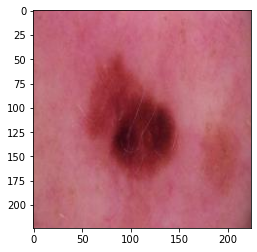

In [9]:
plt.imshow(image_data[4000])

In [10]:
target[4000]

0

In [16]:
np.save("test_data.npy",image_data)

In [ ]:
np.save("train_label.npy",target)